## 1. Data Exploration

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/refs/heads/master/Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Genre_Female            200 non-null    bool 
 5   Genre_Male              200 non-null    bool 
dtypes: bool(2), int64(4)
memory usage: 6.8 KB


In [10]:
df = pd.get_dummies(df, columns=['Genre'])

In [11]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


## 2. Feature Scaling

In [12]:
X = df.drop(columns=['CustomerID'],axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 3. Finding Optimal K

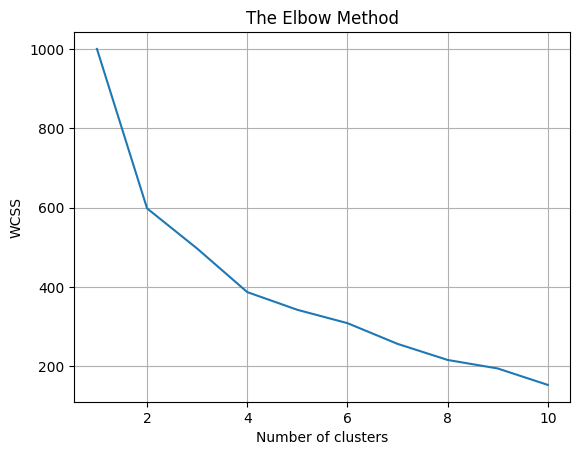

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()



## 4.Clustering

In [23]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

## 5. Cluster Interpretation

In [26]:
df['labels'] = y_kmeans.tolist()

In [27]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,labels
0,1,19,15,39,False,True,4
1,2,21,15,81,False,True,4
2,3,20,16,6,True,False,2
3,4,23,16,77,True,False,1
4,5,31,17,40,True,False,2


In [31]:
valuable = df[['Age','Annual Income (k$)','Spending Score (1-100)']].groupby(df['labels']).mean()
print("Average of Age, income and spending score of each cluster")
print(valuable)

Average of Age, income and spending score of each cluster
              Age  Annual Income (k$)  Spending Score (1-100)
labels                                                       
0       52.928571           60.238095               31.357143
1       28.392857           60.428571               68.178571
2       47.803571           58.071429               34.875000
3       33.210526           89.736842               79.263158
4       24.037037           45.962963               53.555556
